In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
bookclubs = pd.read_csv('GoodReads_bookclubs.csv')
print(list(bookclubs.columns.values))

['Group_Name', 'avg_time_per_book', 'bookshelf_link', 'category', 'curr_reading_authors', 'curr_reading_titles', 'group_type', 'location', 'member_cnt', 'tags']


In [3]:
small_bookclubs_books = pd.read_csv('GoodReads_small_books.csv')
small_bookclubs = pd.read_csv('GoodReads_small_bookshelves.csv')
small_bookclubs_books = small_bookclubs_books.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
small_bookclubs = small_bookclubs.rename(columns={'book_link': 'url'})
print(list(small_bookclubs.columns.values))
print(list(small_bookclubs_books.columns.values))

['Group_Name', 'author', 'url', 'title']
['author', 'num_pages', 'num_ratings', 'rating', 'title', 'url', 'year_published']


In [4]:
small_bookclub_detail = pd.merge(small_bookclubs, bookclubs, how='left', on ='Group_Name')
print(list(small_bookclub_detail.columns.values))
print(list(small_bookclubs_books.columns.values))
print(len(small_bookclubs))
print(len(small_bookclub_detail))

['Group_Name', 'author', 'url', 'title', 'avg_time_per_book', 'bookshelf_link', 'category', 'curr_reading_authors', 'curr_reading_titles', 'group_type', 'location', 'member_cnt', 'tags']
['author', 'num_pages', 'num_ratings', 'rating', 'title', 'url', 'year_published']
445
445


In [5]:
small_bookclub_book_detail = pd.merge(small_bookclub_detail, small_bookclubs_books, how='left', on ='url')
print(list(small_bookclub_book_detail.columns.values))
print(len(small_bookclub_book_detail))

['Group_Name', 'author_x', 'url', 'title_x', 'avg_time_per_book', 'bookshelf_link', 'category', 'curr_reading_authors', 'curr_reading_titles', 'group_type', 'location', 'member_cnt', 'tags', 'author_y', 'num_pages', 'num_ratings', 'rating', 'title_y', 'year_published']
445


In [6]:
small_books_club_info = small_bookclub_book_detail.drop(['url','bookshelf_link','author_y','title_y',
                              'author_x','title_x','num_pages','num_ratings','rating','year_published'], axis=1)
small_books_book_info = small_bookclub_book_detail.drop(['url','bookshelf_link','author_x','title_x','category',
                             'curr_reading_authors','curr_reading_titles','group_type','location',
                             'member_cnt','tags'], axis=1)

Text(0.5,1,'Histogram of Member Count (Small Bookclubs)')

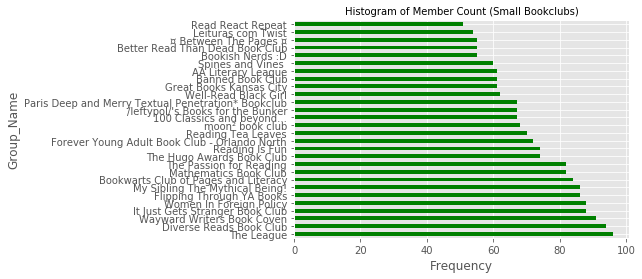

In [37]:
small_books_club_info.groupby('Group_Name')['member_cnt'].median().sort_values(ascending=False).plot.barh(color='g')
plt.xlabel('Frequency')
#plt.ylabel('Frequency')
plt.title('Histogram of Member Count (Small Bookclubs)', fontsize=10)

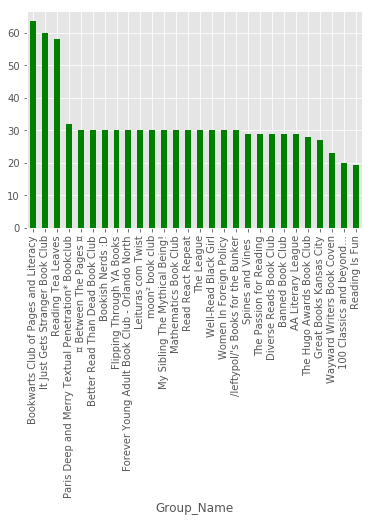

In [38]:
small_books_club_info.groupby('Group_Name')['avg_time_per_book'].median().sort_values(ascending=False).plot.bar(color='g')


Text(0.5,1,'Median Number of Pages (Small Bookclubs)')

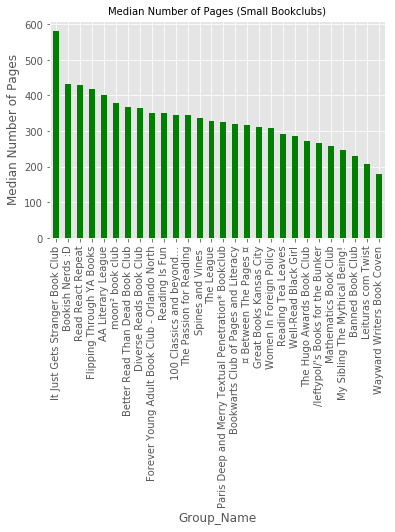

In [39]:
small_bookclub_book_detail.groupby('Group_Name')['num_pages'].median().sort_values(ascending=False).plot.bar(color='g')
#plt.xlabel('Frequency')
plt.ylabel('Median Number of Pages')
plt.title('Median Number of Pages (Small Bookclubs)', fontsize=10)

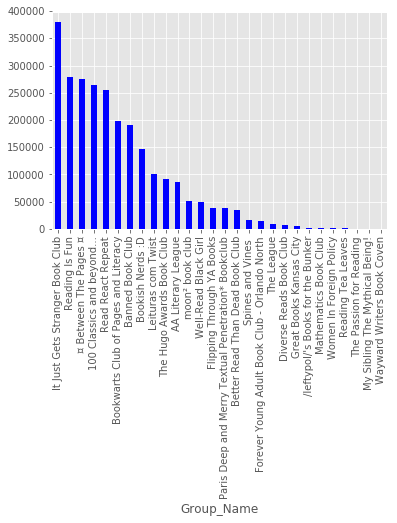

In [10]:
small_bookclub_book_detail.groupby('Group_Name')['num_ratings'].median().sort_values(ascending=False).plot.bar(color='b')

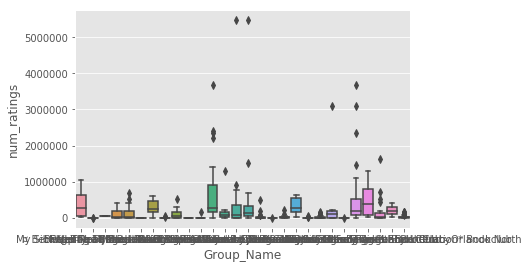

In [11]:
sns.boxplot('Group_Name','num_ratings', data=small_bookclub_book_detail)

Text(0.5,1,'Distribution of Number of Ratings (Small Groups)')

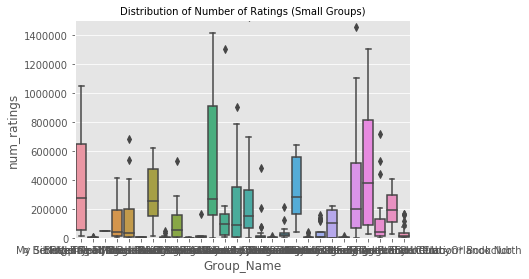

In [44]:
sns.boxplot('Group_Name','num_ratings', data=small_bookclub_book_detail)
plt.ylim(0,1500000)
plt.title('Distribution of Number of Ratings (Small Groups)', fontsize=10)

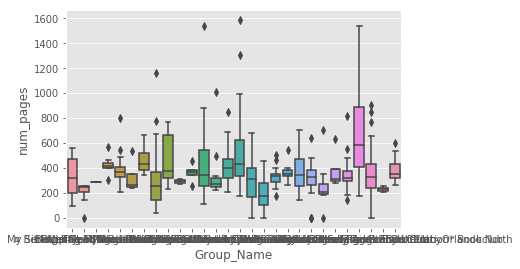

In [13]:
sns.boxplot('Group_Name','num_pages', data=small_bookclub_book_detail)

Text(0.5,1,'Rating Distribution(Small Bookclubs)')

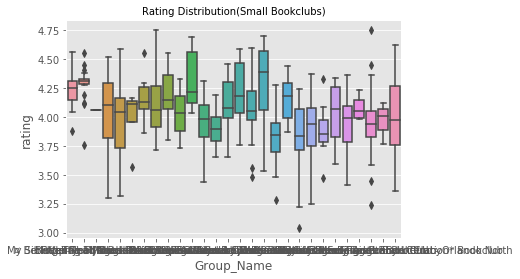

In [40]:
sns.boxplot('Group_Name','rating', data=small_bookclub_book_detail)
#plt.xlabel('Frequency')
#plt.ylabel('Median Number of Pages')
plt.title('Rating Distribution(Small Bookclubs)', fontsize=10)

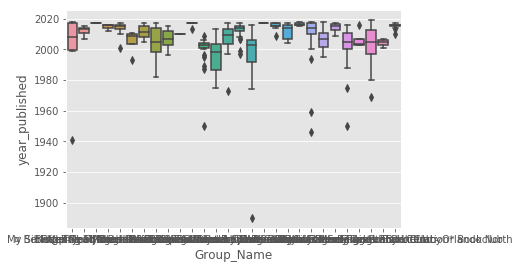

In [15]:
b = small_bookclub_book_detail[small_bookclub_book_detail.year_published != 0]
sns.boxplot('Group_Name','year_published', data=b)

In [16]:
small_books_club_info2 = small_books_club_info.groupby('Group_Name').first()
num_curr_reading = []

for x in range(0,len(small_books_club_info2)):
    num_curr_reading.append(small_books_club_info2['curr_reading_authors'][x].count(',')+1)
    
small_books_club_info2['num_curr_reading'] = num_curr_reading

In [17]:
small_books_book_info3 = small_books_book_info.groupby(['Group_Name'])
colFun = {'author_y': ['count'],
          'title_y':['count'],
          'num_pages':['min', 'max','median','mean'],
          'num_ratings':['min', 'max','median','mean'],
          'rating':['min', 'max','median','mean'],
          'year_published':['min', 'max','median','mean']}
small_books_book_info2=small_books_book_info3.agg(colFun)

GR_data = pd.merge(small_books_book_info2, small_books_club_info2, how='left', on ='Group_Name')

/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


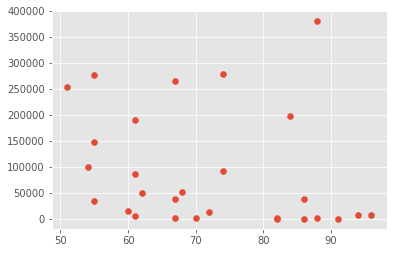

In [18]:
plt.scatter(GR_data['member_cnt'], GR_data[('num_ratings', 'median')])

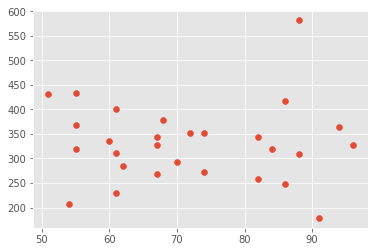

In [19]:
plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'max')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'mean')])

Text(0.5,1,'Median Number of Pages (Small Bookclubs)')

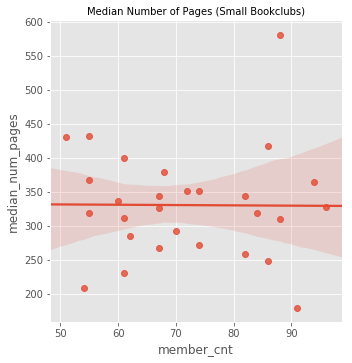

In [41]:
GR_data = GR_data.rename(columns={('num_pages', 'median'): 'median_num_pages',
                                 ('num_pages', 'mean'): 'mean_num_pages'})
sns.lmplot('member_cnt', 'median_num_pages', GR_data)
#sns.lmplot('member_cnt', 'mean_num_pages', GR_data)
plt.title('Median Number of Pages (Small Bookclubs)', fontsize=10)

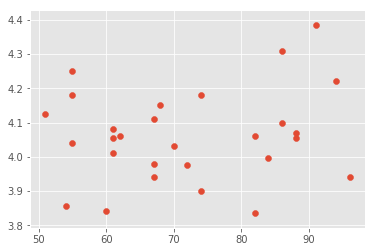

In [21]:
plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'max')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'mean')])

Text(0.5,1,'Median Book Rating (Small Bookclubs)')

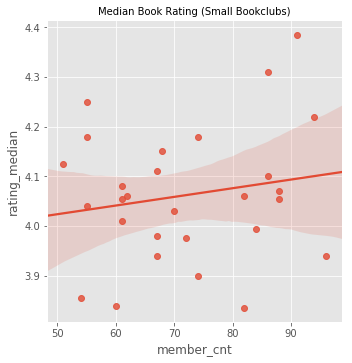

In [43]:
GR_data = GR_data.rename(columns={('rating', 'median'): 'rating_median'})
sns.lmplot('member_cnt', 'rating_median', GR_data)
plt.title('Median Book Rating (Small Bookclubs)', fontsize=10)

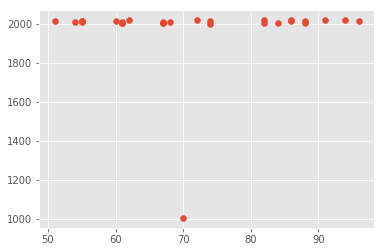

In [23]:
plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'max')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'mean')])

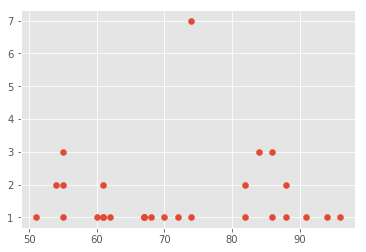

In [24]:
plt.scatter(GR_data['member_cnt'], GR_data[('num_curr_reading')])

In [25]:
GR_data = GR_data.reset_index()
#b = small_bookclub_book_detail[small_bookclub_book_detail.year_published != 0]

In [27]:
GR_data
num_curr_reading = GR_data['num_curr_reading']

,Group_Name,"(author_y, count)","(title_y, count)","(num_pages, min)","(num_pages, max)",median_num_pages,mean_num_pages,"(num_ratings, min)","(num_ratings, max)","(num_ratings, median)",...,"(year_published, mean)",avg_time_per_book,category,curr_reading_authors,curr_reading_titles,group_type,location,member_cnt,tags,num_curr_reading
0,/leftypol/'s Books for the Bunker,4,4,240,534,267.5,327.250000,53,8599,2110.0,...,2005.250000,30.000000,"Books & Literature, Nonfiction",David Graeber,"""Debt: The First 5,000 Years""",This is a public group. Anyone can join and in...,NaN,67,"anarchism, bookclub, books, bunker, communism,...",1
1,100 Classics and beyond...,30,30,112,1536,344.0,441.300000,1630,3673833,264745.0,...,2000.000000,20.000000,"Books & Literature, Literature & Fiction",Virginia Woolf,"""To the Lighthouse""",This is a public group. Anyone can join and in...,NaN,67,"bookclub, classic-literature, classics",1
2,AA Literary League,27,27,208,849,400.0,412.518519,45,5469609,86386.0,...,1933.111111,29.000000,"Books & Literature, General","Haruki Murakami, Alfred Birnbaum</span></a> <s...","""Hard-Boiled Wonderland and the End of the World""",This is a private group. Members must be invit...,NaN,61,"baseball, bookclub, everything-and-anything",2
3,Banned Book Club,3,3,208,256,230.0,231.333333,23792,404132,190624.0,...,2004.333333,29.000000,"Books & Literature, Literature & Fiction",Carolyn Mackler,"""The Earth, My Butt, and Other Big Round Thing...",This is a public group. Anyone can join and in...,India,61,"banned-books, bookclub, books, bookworms, cens...",1
4,Better Read Than Dead Book Club,27,27,208,801,368.0,386.777778,443,678295,34676.0,...,2014.000000,30.000000,"Books & Literature, Young Adult",Laurie Halse Anderson,"""Speak""",This is a public group. Anyone can join and in...,NaN,55,"book-club, bookclub, young-adult",1
5,Bookish Nerds :D,30,30,176,1584,433.0,526.800000,629,5469609,147169.0,...,2012.466667,30.000000,"Books & Literature, Literature & Fiction","John Green, Patrick Rothfuss, Patrick Rothfuss","""Turtles All the Way Down"", ""The Wise Man's Fe...",This is a public group. Anyone can join and in...,The United Kingdom,55,"bookclub, fantasy, horror, mystery, parnormal,...",3
6,Bookwarts Club of Pages and Literacy,30,30,145,814,319.0,342.766667,1309,3673833,197767.5,...,2002.233333,63.666667,"Books & Literature, General","F. Scott Fitzgerald, Anne McCaffrey, Margaret ...","""The Great Gatsby"", ""Dragonflight (Dragonrider...",This is a public group. Anyone can join and in...,NaN,84,"bookclub, harry-potter, young-adult",3
7,Diverse Reads Book Club,5,5,256,453,365.0,360.000000,35,166699,7748.0,...,2016.200000,29.000000,"Books & Literature, Literature & Fiction",Erika L. Sánchez,"""I Am Not Your Perfect Mexican Daughter""",This is a public group. Anyone can join and in...,NaN,94,"african, african-american, african-american-fi...",1
8,Flipping Through YA Books,8,8,304,565,417.0,425.750000,2449,410995,39058.0,...,2014.875000,30.000000,"Books & Literature, Young Adult","Sophie Jordan, Sarah J. Maas, Rosamund Hodge","""Reign of Shadows (Reign of Shadows, #1)"", ""He...",This is a public group. Anyone can join and in...,NaN,86,"bookclub, discussion, ya, youngadult",3
9,Forever Young Adult Book Club - Orlando North,30,30,260,602,352.0,377.833333,288,166699,13688.5,...,2015.533333,30.000000,"Books & Literature, Young Adult",Zoraida Córdova,"""Labyrinth Lost (Brooklyn Brujas, #1)""",This is a public group. Anyone can join and in...,"Sanford, FL",72,"book-club, bookclub, forever-young-adult, fya,...",1


In [32]:
num_curr_reading = GR_data['num_curr_reading']
num_curr_reading[2] = 1
num_curr_reading[11] = 1
num_curr_reading[12] = 1
num_curr_reading[17] = 4
num_curr_reading[22] = 1
num_curr_reading
GR_data['corrected_num_curr_reading'] = num_curr_reading
GR_data['corrected_num_curr_reading']

/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

0     1
1     1
2     1
3     1
4     1
5     3
6     3
7     1
8     3
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    4
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    2
Name: corrected_num_curr_reading, dtype: int64

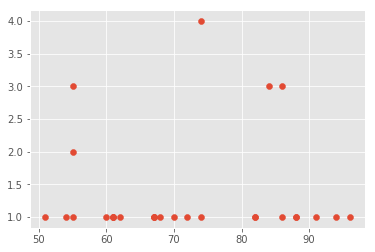

In [33]:
plt.scatter(GR_data['member_cnt'], GR_data[('corrected_num_curr_reading')])